# Creating Simple Log Plots of Well Log Data
The accompanying video for this notebook can be found on my YouTube channel at:  https://youtu.be/yNnMY_-X0Bo

Please check it out, like and subscribe.

## Introduction

Well log plots are a common visualization tool within geoscience and petrophysics. They allow easy visualization of data (for example, Gamma Ray, Neutron Porosity, Bulk Density, etc) that has been acquired along the length (depth) of a wellbore. On these plots we display our logging measurements on the x axis and measure depth or true vertical depth on the y-axis.

In this short tutorial we will see how to create a simple log plot visualisation from one of the Volve Wells.

## Importing Libraries and Loading LAS Data
The first stage of any python project or notebook is generally to import the required libraries. In this case we are going to be using `lasio` to load our las file, `pandas` for storing our well log data, and `matplotlib` for visualising our data.

In [1]:
import pandas as pd
import lasio
import matplotlib.pyplot as plt

The data we are using for this short tutorial comes from the publicly released Equinor Volve dataset. Details of which can be found [here](https://www.equinor.com/en/what-we-do/digitalisation-in-our-dna/volve-field-data-village-download.html)

To read the data we will use the lasio library which we explored in the previous notebook and [video](https://youtu.be/8U4gxMJybJs).

In [2]:
las = lasio.read("Data/15-9-19_SR_COMP.LAS")

Then, to check the contents of the file we can use df.head(), which will return back the first five rows of our dataframe.

In [3]:
df = las.df()
df.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


We can see from the returned results that we have several columns of data, each column represents measurements that have been taken whilst the logging tools have been moved along the well.

The columns represent the following:
- AC for acoustic compressional slowness
- CALI for borehole caliper
- DEN for bulk density
- GR for gamma ray
- NEU for neutron porosity
- RDEP for deep resisitivity
- RMED for medium resistivity

To make it easier to work with our dataframe, we can convert the dataframe index, which is set to depth, to a column within the dataframe. We can achieve this by reseting the index like so.

Note that `inplace=True` allows us to make the changes to the original dataframe object.

In [4]:
df.reset_index(inplace=True)

We can call upon `df.head()` again to ensure our new column has been created.

In [5]:
df.head()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
1,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
2,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
3,102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
4,102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


We need to do a slight rename on the DEPT column and change it to DEPTH

In [6]:
df.rename(columns={'DEPT':'DEPTH'}, inplace=True)

In [7]:
df.head()

,DEPTH,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
1,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
2,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
3,102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
4,102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


Now that our data is in the right format, and the columns are correctly labelled, we can move onto generating our log plot.

### Creating a Simple Line Plot

We can easily create a simple plot by calling upon `df.plot()` and passing in two of our columns

<AxesSubplot:xlabel='GR'>

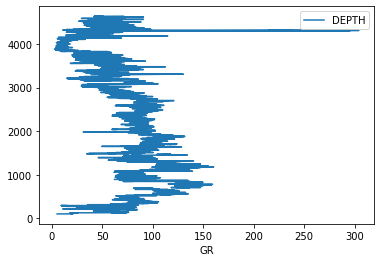

In [8]:
df.plot('GR', 'DEPTH')

When we run this cell, we get a very simple plot that is hard to read and is also upside down. 

### Quick Subplot

If we want to view all of the columns within the dataframe, we can generate a subplot grid. 

This is done by taking the same line as before (`df.plot()`), and instead of passing in curve names, we pass in `subplots=True`. We can also specify a figure size (`figsize()`, which controls how large the plot will appear.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

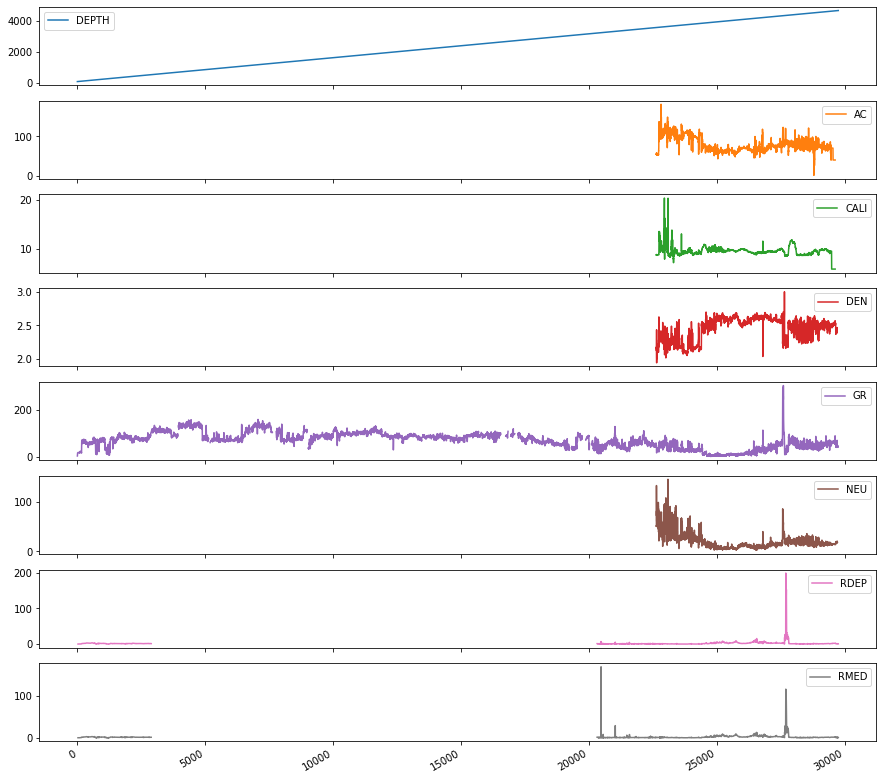

In [9]:
df.plot(subplots=True, figsize=(15, 15))

And we now see a grid of plots, one for each of the columns within the dataframe. This is a useful way to check where we have data and where we may have gaps. 

We do not have much control over this plot, but we will now see how we can start building up a log plot with multiple columns and have full control over the scale, colour and visual appearance of the plot.

### Working with Subplots in Matplotlib

There are many ways to generate subplots in using matplotlib. For this particular tutorial we will work with `subplot2grid`.

First we have to define a figure and call upon `plt.subplots`. Within the argument we can pass in the figure size, which here is set to 10 by 10.

Next, we need to create an axis on our figure object. We can do this by assigning `ax1` is equal to `plt.subplot2grid()`. 

We first pass in the shape of the subplot grid, which for this example we will set 1 by 1. Next we specify the location of our subplot using index positions. 

As we only have 1 subplot, we will set the location to zero zero.  Rowspan and colspan are both set to 1, which means they will only be 1 column wide by 1 row high.

Next, we need to tell matplotlib what we want to plot. In this case we are going use ax1.plot, and pass in our Gamma Ray and Depth columns.

Using the ax notation, we can further customise the plot by setting the x and y limits, and displaying the grid.

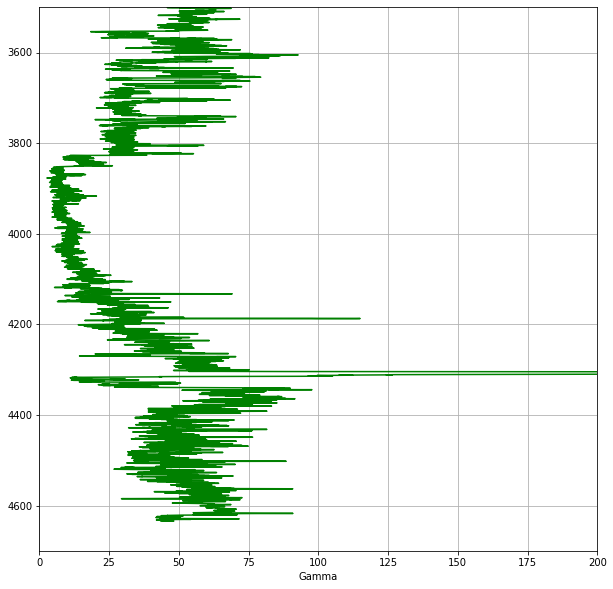

In [10]:
fig = plt.subplots(figsize=(10,10))

#Set up the plot axis
ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan = 1) 

ax1.plot("GR", "DEPTH", data = df, color = "green") # Call the data from the df dataframe
ax1.set_xlabel("Gamma") # Assign a track title
ax1.set_xlim(0, 200) # Change the limits for the curve being plotted
ax1.set_ylim(4700, 3500) # Set the depth range
ax1.grid() # Display the grid


Great! There we have a much better looking plot, and we can now start adding new tracks / subplots to our overall log plot.

#### Adding the Resistivity Log

To add a new track / subplot to our figure, we can repeat what we did above and add a new axis, `ax2`. We increment the second digit in the layout of `plt.subplot2grid()` so it is now 1 row, by 2 columns. For `ax2`, we need to place it in the second column and this is done by changing the location arguement from (0,0) to (0,1).

Also, as resistivity is normally scale logarithmically, we need to add in the line: `ax2.semilogx()`.

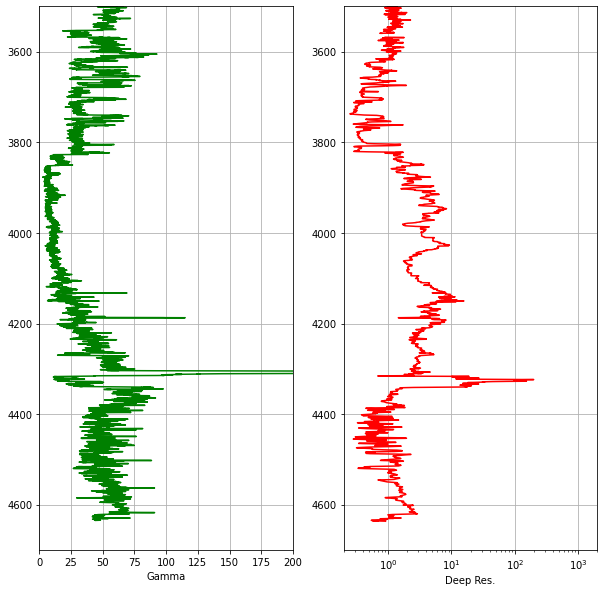

In [11]:
fig = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan = 1)


ax1.plot("GR", "DEPTH", data = df, color = "green") # Call the data from the well dataframe
ax1.set_xlabel("Gamma") # Assign a track title
ax1.set_xlim(0, 200) # Change the limits for the curve being plotted
ax1.set_ylim(4700, 3500) # Set the depth range
ax1.grid() # Display the grid

ax2.plot("RDEP", "DEPTH", data = df, color = "red")
ax2.set_xlabel("Deep Res.")
ax2.set_xlim(0.2, 2000)
ax2.semilogx()
ax2.set_ylim(4700, 3500)
ax2.grid()


#### Adding the Density Log

To add a third track / subplot, we can repeat the above by adding in the density as a new track.

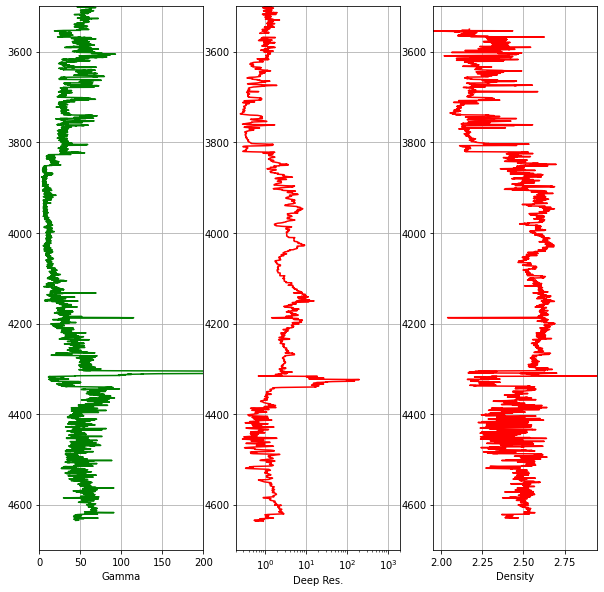

In [12]:
fig = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

ax1.plot("GR", "DEPTH", data = df, color = "green") # Call the data from the well dataframe
ax1.set_xlabel("Gamma") # Assign a track title
ax1.set_xlim(0, 200) # Change the limits for the curve being plotted
ax1.set_ylim(4700, 3500) # Set the depth range
ax1.grid() # Display the grid

ax2.plot("RDEP", "DEPTH", data = df, color = "red")
ax2.set_xlabel("Deep Res.")
ax2.set_xlim(0.2, 2000)
ax2.semilogx()
ax2.set_ylim(4700, 3500)
ax2.grid()

ax3.plot("DEN", "DEPTH", data = df, color = "red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.set_ylim(4700, 3500)
ax3.grid()




### Tidying Up Common Elements
We can see from the previous cell that we have a number of elements that are repeated in each of the axis calls such as `ax.set_ylim(4700, 3500)`. We can separate these out so that we only need to call theses functions once.

This is achieved by using a for loop and enumerating over `fig.axes`

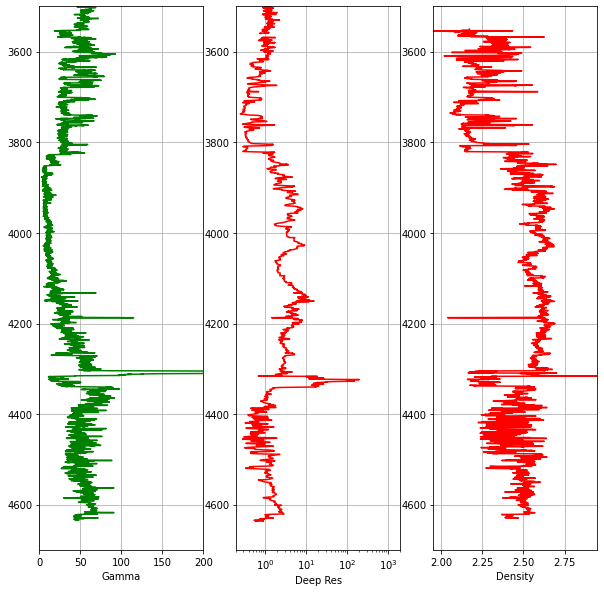

In [13]:
fig, axes = plt.subplots(figsize=(10,10))

curve_names = ['Gamma', 'Deep Res', 'Density']

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

ax1.plot("GR", "DEPTH", data = df, color = "green")
ax1.set_xlim(0, 200) 

ax2.plot("RDEP", "DEPTH", data = df, color = "red")
ax2.set_xlim(0.2, 2000)
ax2.semilogx()

ax3.plot("DEN", "DEPTH", data = df, color = "red")
ax3.set_xlim(1.95, 2.95)

for i, ax in enumerate(fig.axes):
    ax.set_ylim(4700, 3500) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])


To tidy the plot up a little more, we can remove the depth labels in between each subplot / track and reduce the space between them.

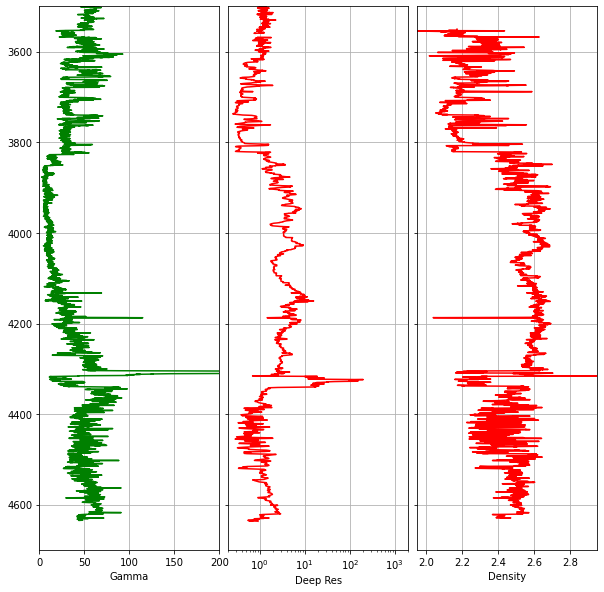

In [14]:
fig, axes = plt.subplots(figsize=(10,10))

curve_names = ['Gamma', 'Deep Res', 'Density']

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

#Set up the individual log tracks / subplots
ax1.plot("GR", "DEPTH", data = df, color = "green")
ax1.set_xlim(0, 200) 

ax2.plot("RDEP", "DEPTH", data = df, color = "red")
ax2.set_xlim(0.2, 2000)
ax2.semilogx()

ax3.plot("DEN", "DEPTH", data = df, color = "red")
ax3.set_xlim(1.95, 2.95)

#Set up the common elements between the subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(4700, 3500) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])

#Hide tick labels on the y-axis 
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)

#Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.05)

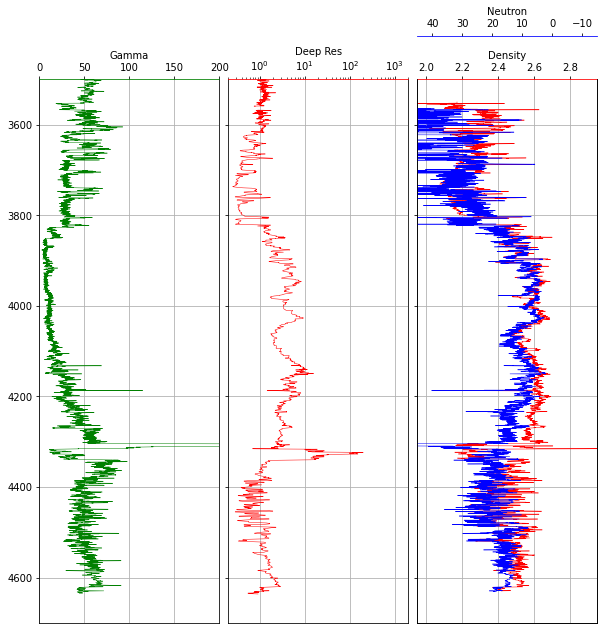

In [17]:
fig, axes = plt.subplots(figsize=(10,10))

curve_names = ['Gamma', 'Deep Res', 'Density', 'Neutron']


#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)
ax4 = ax3.twiny()


#Set up the individual log tracks / subplots
ax1.plot("GR", "DEPTH", data = df, color = "green", lw = 0.5)
ax1.set_xlim(0, 200) 
ax1.spines['top'].set_edgecolor('green')

ax2.plot("RDEP", "DEPTH", data = df, color = "red", lw = 0.5)
ax2.set_xlim(0.2, 2000)
ax2.semilogx()
ax2.spines['top'].set_edgecolor('red')

ax3.plot("DEN", "DEPTH", data = df, color = "red", lw = 0.5)
ax3.set_xlim(1.95, 2.95)
ax3.spines['top'].set_edgecolor('red')


ax4.plot("NEU", "DEPTH", data = df, color = "blue", lw = 0.5)
ax4.set_xlim(45, -15)
ax4.spines['top'].set_edgecolor('blue')


#Set up the common elements between the subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(4700, 3500) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i == 3:
        ax.spines["top"].set_position(("axes", 1.08))
    else:
        ax.grid()
        

#Hide tick labels on the y-axis 
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)

#Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.05)

plt.savefig('logplot.png', dpi=150)

# Summary

In this short tutorial we have covered the basics of how to display a well log plot using matplotlib, how to add multiple tracks/subplots and plot two curves on top of each other. Matplotlib provides a great way to build simple log plots from scratch and is a great library to learn.

---

*Thanks for reading!*

*If you have found this article useful, please feel free to check out my other articles looking at various aspects of Python and well log data. You can also find my code used in this article and others at [GitHub](https://github.com/andymcdgeo).*

*If you want to get in touch you can find me on [LinkedIn](https://www.linkedin.com/in/andymcdonaldgeo/) or at my [website](http://andymcdonald.scot/).*

*Interested in learning more about python and well log data or petrophysics? Follow me on [Medium](https://medium.com/@andymcdonaldgeo).*

*If you have enjoyed this notebook, video or article or any others and want to show your appreciation you are welcome to [Buy Me a Coffee](https://www.buymeacoffee.com/andymcdonaldgeo)*